# 1. SYRIATEL PREDICTIVE ANALYSIS OF CUSTOMER CHURN

## 1. Business Understanding

#### 1.1. Introduction 

SyriaTel, a telecommunications company based in Damascus, Syria, faces a significant challenge in reducing customer churn, which can adversely impact its revenue and overall profitability. Customer churn refers to the phenomenon where customers terminate their subscriptions, often switching to competitors or discontinuing the service altogether. Poor service quality and customer support are primary drivers of customer churn. Furthermore, the ease with which customers can switch providers and experiencing subpar customer service, such as needing multiple contacts to resolve issues, also substantially contribute to high churn rates. These factors highlight the importance of prioritizing service quality and improving customer satisfaction to effectively reduce churn.

#### 1.2. Business stakeholders

The primary stakeholder in this project is SyriaTel, a telecommunications company based in Damascus, Syria. Their main objective is to understand the patterns and reasons behind customer churn. By gaining a comprehensive understanding of why customers leave, SyriaTel can implement proactive measures to retain them. This includes improving service quality, enhancing customer support, and offering tailored solutions to address customer needs. Utilizing data-driven insights enables SyriaTel to make informed decisions, customize services, and allocate resources effectively to reduce churn. This proactive approach not only boosts customer satisfaction but also results in financial savings by minimizing the revenue loss associated with customers discontinuing their services.

#### 1.3.  Main Objective

To build a predictive classifier that assists SyrialTel Telecommunication company in determining if there is a predictable pattern to customer churning.

#### 1.4.  Experimental Design

The processes to be undertaken in this project are:

1. Data Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preparation
5. Modelling
6. Evaluation
7. Conclusion

## 2. Data Understanding

- The data utilized for this project has been sourced from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). The dataset contains 3,333 entries and 21 columns, providing detailed information on various aspects of customer accounts and usage. These include the state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls, and churn status.

#### Summary of Features in the Dataset
Each entry in the dataset represents a customer, and the attributes describe different aspects of their account and usage.


| Attribute                | Description                                                                                     |
|--------------------------|-------------------------------------------------------------------------------------------------|
| State                    | The state in which the customer resides.                                                       |
| Account Length           | The number of days the customer has had the account.                                             |
| Area Code                | The area code of the customer's phone number.                                                    |
| Phone Number             | The customer's phone number.                                                                    |
| International Plan       | A boolean indicating whether the customer has the international calling plan (True or False).   |
| Voice Mail Plan          | A boolean indicating whether the customer has the voicemail plan (True or False).               |
| Number Vmail Messages    | The number of voicemail messages the customer has sent.                                          |
| Total Day Minutes        | The total number of minutes the customer has been in calls during the day.                        |
| Total Day Calls          | The total number of calls the customer has made during the day.                                   |
| Total Day Charge         | The total amount of money charged by the telecom company for calls during the day.               |
| Total Eve Minutes        | The total number of minutes the customer has been in calls during the evening.                    |
| Total Eve Calls          | The total number of calls the customer has made during the evening.                               |
| Total Eve Charge         | The total amount of money charged by the telecom company for calls during the evening.           |
| Total Night Minutes      | The total number of minutes the customer has been in calls during the night.                      |
| Total Night Calls        | The total number of calls the customer has made during the night.                                  |
| Total Night Charge       | The total amount of money charged by the telecom company for calls during the night.             |
| Total Intl Minutes       | The total number of minutes the user has been in international calls.                             |
| Total Intl Calls         | The total number of international calls the customer has made.                                     |
| Total Intl Charge        | The total amount of money charged by the telecom company for international calls.                 |
| Customer Service Calls   | The number of calls the customer has made to customer service.                                     |
| Churn                    | A boolean indicating whether the customer terminated their contract (True or False). 

#### 2.2. Suitability of above data in predicting customer churn
The dataset contains a variety of factors crucial for understanding customer behavior and forecasting churn for SyriaTel. Essential attributes include customer subscriptions like international plans and voice mail plans, as well as call usage statistics such as total day minutes and total night minutes. The 'Churn' column, which acts as the target variable, distinguishes between customers who have terminated their service ('True') and those who haven't ('False'). This comprehensive dataset lays the groundwork for building a predictive model to accurately identify churn risks and implement focused retention strategies. This aligns with the project's goal of effectively reducing customer churn.

#### 2.3 importing the required libraries,loading and checking the data

In [1]:
# Importing the relevant libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import joblib
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')

from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer, auc
from sklearn.metrics import roc_auc_score,ConfusionMatrixDisplay,confusion_matrix , classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier


In [4]:
# loading the datasets
dataFrame = pd.read_csv("Dataset/bigml_59c28831336c6604c800002a.csv")

In [5]:
# Creating a copy of the dataset to work with.
data = dataFrame.copy()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# checking the shape of the data
(data.shape)

(3333, 21)

In [7]:
print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns")

Data has 3333 rows and 21 columns


In [8]:
# checking for the information about the data Frame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
# checking for the unique values in the data
for i in data.columns:
    print(f"Unique values in {i} are {data[i].nunique()}")

Unique values in state are 51
Unique values in account length are 212
Unique values in area code are 3
Unique values in phone number are 3333
Unique values in international plan are 2
Unique values in voice mail plan are 2
Unique values in number vmail messages are 46
Unique values in total day minutes are 1667
Unique values in total day calls are 119
Unique values in total day charge are 1667
Unique values in total eve minutes are 1611
Unique values in total eve calls are 123
Unique values in total eve charge are 1440
Unique values in total night minutes are 1591
Unique values in total night calls are 120
Unique values in total night charge are 933
Unique values in total intl minutes are 162
Unique values in total intl calls are 21
Unique values in total intl charge are 162
Unique values in customer service calls are 10
Unique values in churn are 2


### 3. Data Prepping
#### 3.1 Data Cleaning

In [10]:
# Converting area code to object as it takes no mathematical significance.
data['area code'] = data['area code'].astype('object')

In [11]:
# Checking to confirm that the area code has been converted to object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above information, phone number is best used as unique identifier as it cannot be similar to more than a person.

In [12]:
#checking for duplicates in the data
print(data.duplicated().sum())

0


In [13]:
# checking for missing values in the data
print(data.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


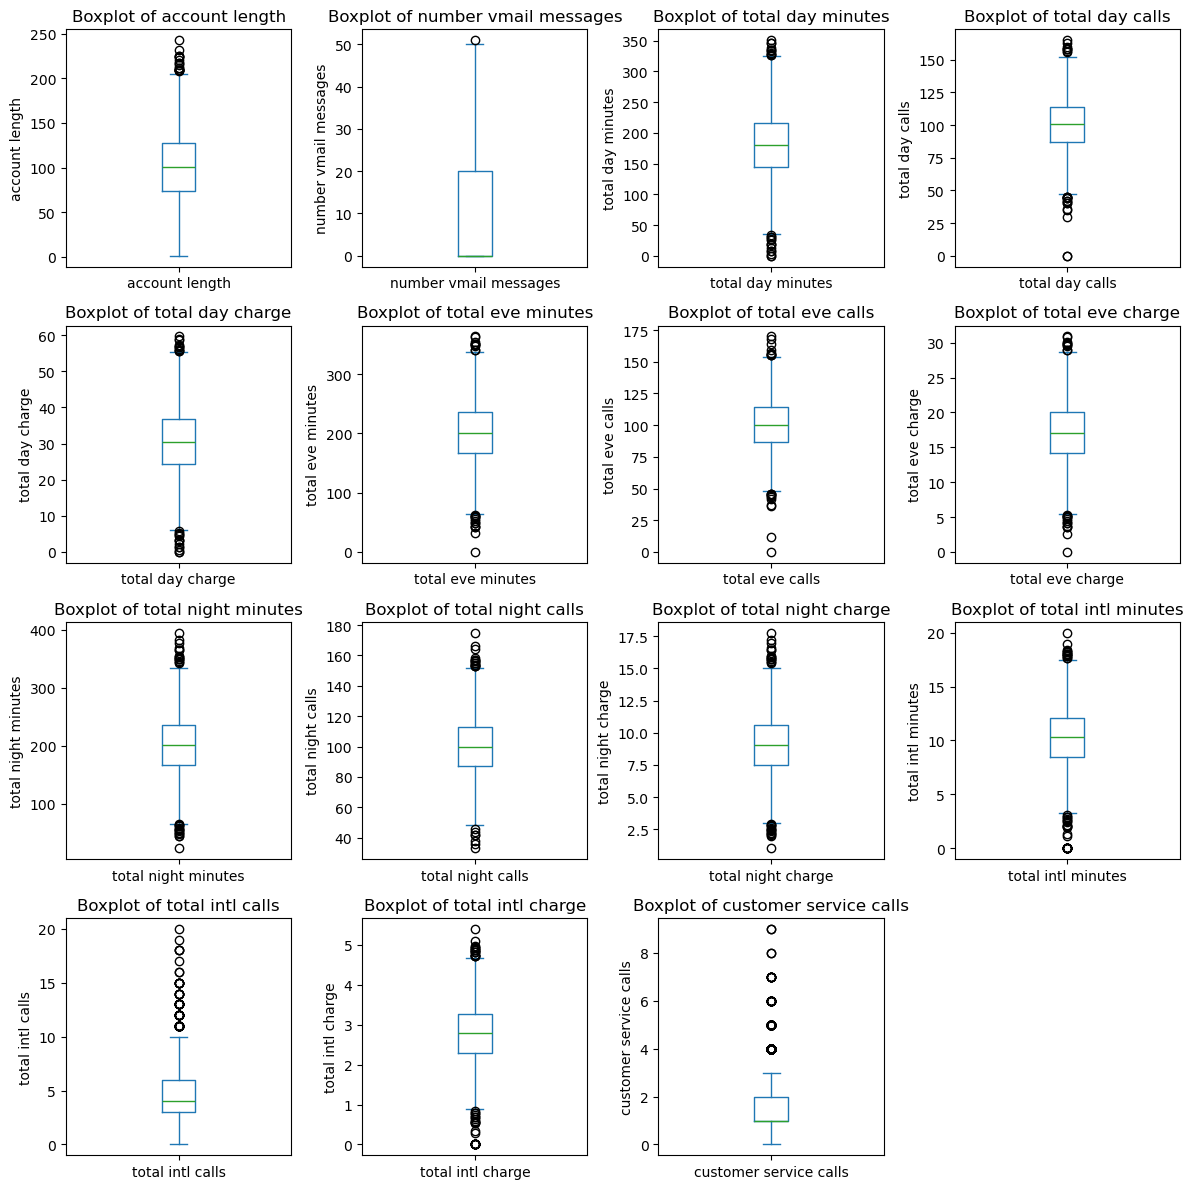

In [14]:
# checking for outliers in numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
num_plots = len(numeric_cols.columns)
num_rows = (num_plots + 3) // 4 # 4 columns
num_cols = min(num_plots, 4)  

plt.figure(figsize=(12, 3 * num_rows))

for i, col in enumerate(numeric_cols.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    data[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')  # Set title
    plt.ylabel(col)  # Set y-label

plt.tight_layout()
plt.show()

In [15]:
# Given that the data has no missing values,the phone number column was dropped as it was only significant as a unique identifier during the cleaning process.
data.drop('phone number', axis=1, inplace=True)

From the above the data above is clean; it contains no duplicates and has no missing data. 

 ***Justification for data Cleaning***
 
 The data cleaning process has been performed to build the foundation for meaningful and accurate exploratory analysis by ensuring that the data is accurate, reliable, consistent, complete, and ready for analysis.

#### 3.2. Explotarory Data Analysis

In [16]:
data.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Univariate Analysis

These classification problem project seeks to predict the churn of customers. The target variable is "churn" which is a binary variable. Assesing the distribution of the target variable to see if the data is balanced or not.

In [17]:
# checking for the distribution of the target variable "churn"
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

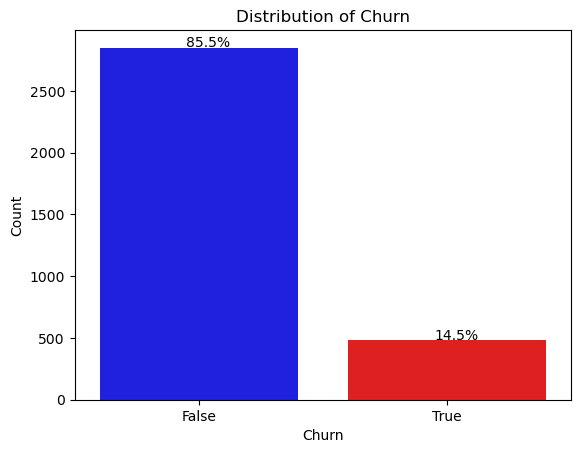

In [18]:
# Plotting the distribution of the target variable
ax = sns.countplot(x='churn', data=data, palette=['blue', 'red'])
total = len(data['churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), color='black')

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

from the 3,333 customers, 483 customers have churned from SyriaTel. This is approximately 14.5 % of the total customers indicating a loss in their customer base.

From the distribution as shown in "Distribution of churn" graph above, their is an uneven distribution of observations with 85.5% of the data belonging to the False class while 14.5% belonging to the true class.

Top 5 States with the highest churn rate

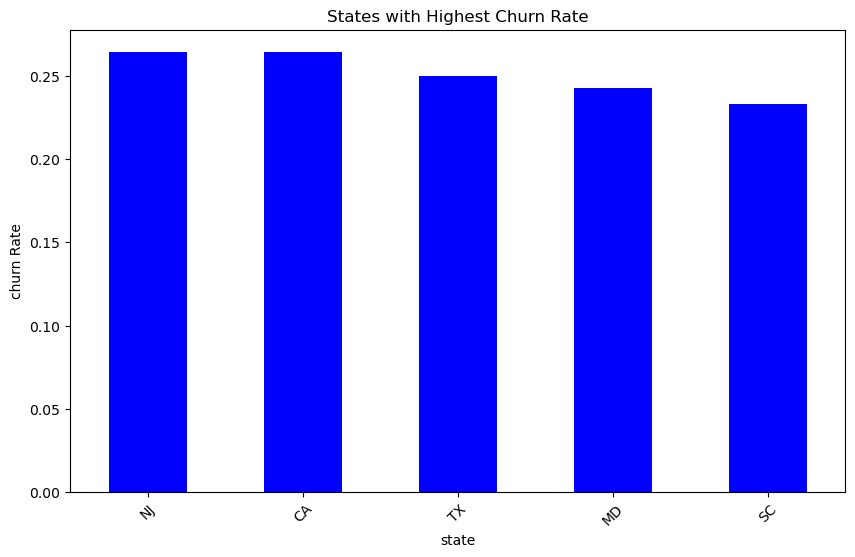

In [19]:
# Calculate churn rate for each state
state_churn_rate = data.groupby('state')['churn'].mean().sort_values(ascending=False)

# Get the top states with the highest churn rate
top_states_churn = state_churn_rate.head(5) 

# Plot the top states with the highest churn rate
plt.figure(figsize=(10, 6))
top_states_churn.plot(kind='bar', color='blue')  
plt.title('States with Highest Churn Rate')
plt.xlabel('state')
plt.ylabel('churn Rate')
plt.xticks(rotation=45)
plt.show()

The top 5 states with the highest churn rate are: 

* NJ: New Jersey
* CA: California
* TX: Texas
* MD: Maryland
* SC: South Carolina

Top 5 States with the lowest churn rate

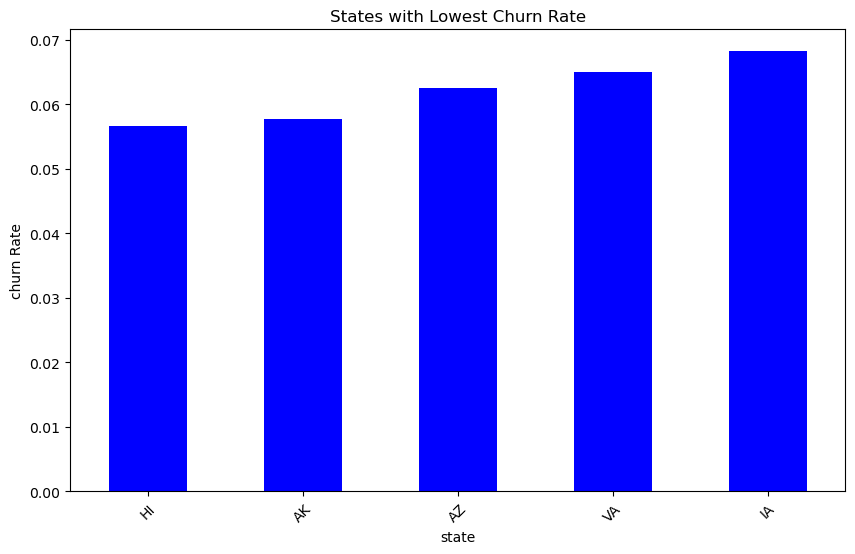

In [20]:
# Calculate churn rate for each state
state_churn_rate = data.groupby('state')['churn'].mean().sort_values()

# Get the top states with the lowest churn rate
bottom_states_churn = state_churn_rate.head(5)  

# Plot the top states with the lowest churn rate
plt.figure(figsize=(10, 6))
bottom_states_churn.plot(kind='bar', color='blue')  
plt.title('States with Lowest Churn Rate')
plt.xlabel('state')
plt.ylabel('churn Rate')
plt.xticks(rotation=45)
plt.show()

The top 5 states with the lowest churn rate are:

* HI: Hawaii
* AK: Alaska
* AZ: Arizona
* VA: Virginia
* LA: Louisiana

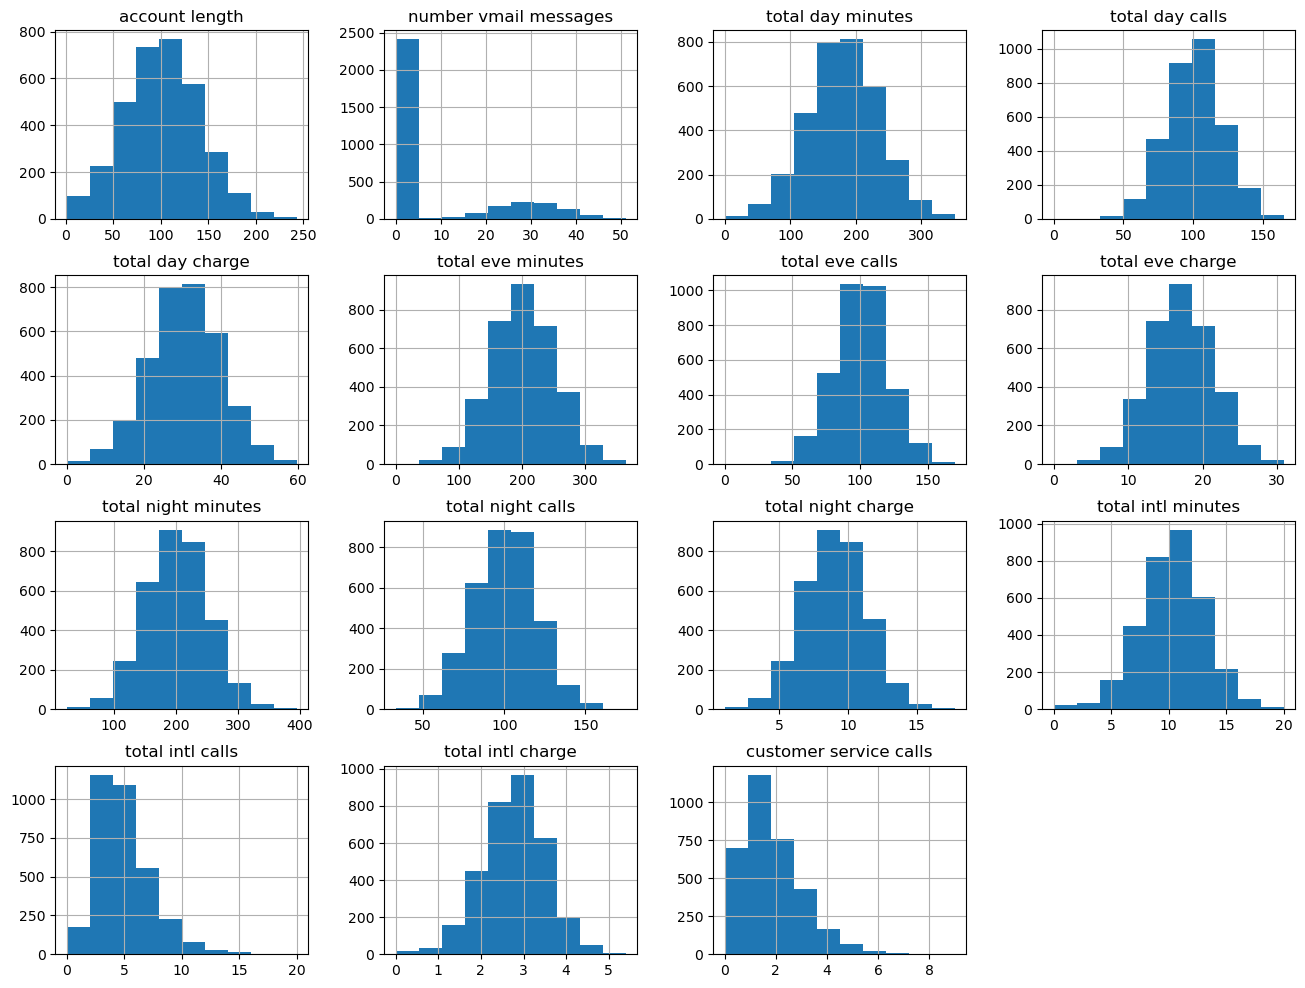

In [21]:
# distribution of features
data.drop(columns='churn').hist(figsize=(16,12));

Most of the features are normally distributed. However, a few of the features have to be scaled and normalized.

**Voice mail plan effect on churn**

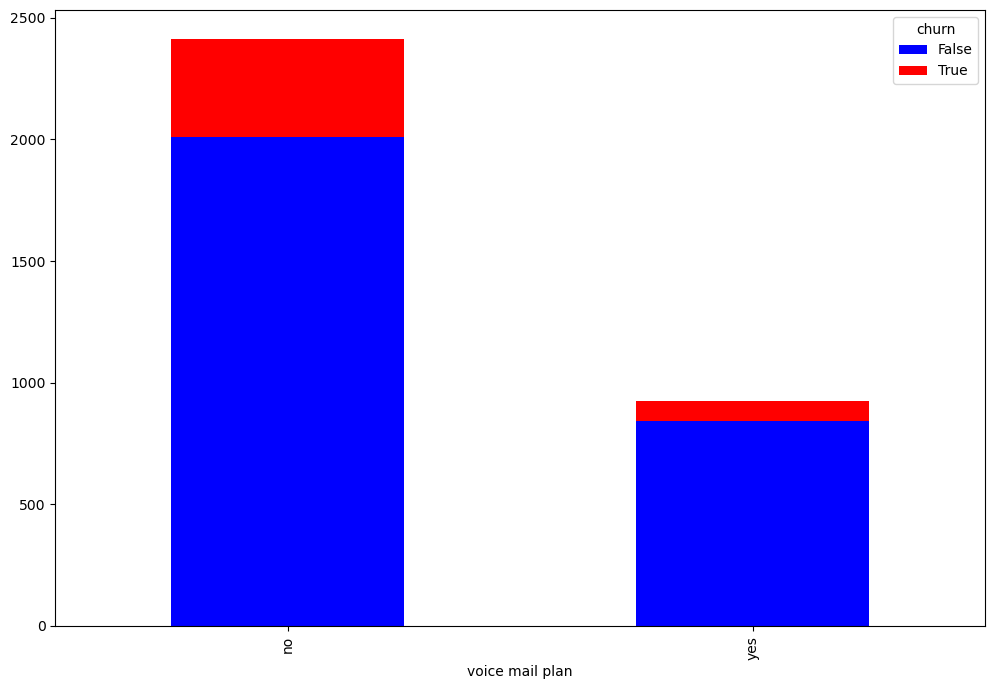

The number of customers subscribed to the voice mail plan : 27.66%
The number of subscribed customers who churned with voice mail plan : 8.68%


In [22]:
#Checking for the impact of the voice mail plan on churn

# Function to take different plans
def plot_churn_vs_plan(data, plan_column):
    # Plotting the churn vs plan with blue and red bars
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(12,8), color=['blue', 'red'])
    plt.show()

    # Calculating the percentage of customers subscribed to the plan
    total_customers = len(data)
    total_subscribed = sum(data[plan_column] == 'yes')
    percentage_subscribed = (total_subscribed / total_customers) * 100
    print('The number of customers subscribed to the {} : {:.2f}%'.format(plan_column, percentage_subscribed))

    # Calculating the percentage of churned customers among those subscribed to the plan
    churned_with_plan = sum((data[plan_column] == 'yes') & (data['churn'] == True))
    percentage_churned_with_plan = (churned_with_plan / total_subscribed) * 100
    print('The number of subscribed customers who churned with {} : {:.2f}%'.format(plan_column, percentage_churned_with_plan))

# Plot churn vs plan for 'voice mail plan'
plot_churn_vs_plan(data, 'voice mail plan')

**International call plan to churn**

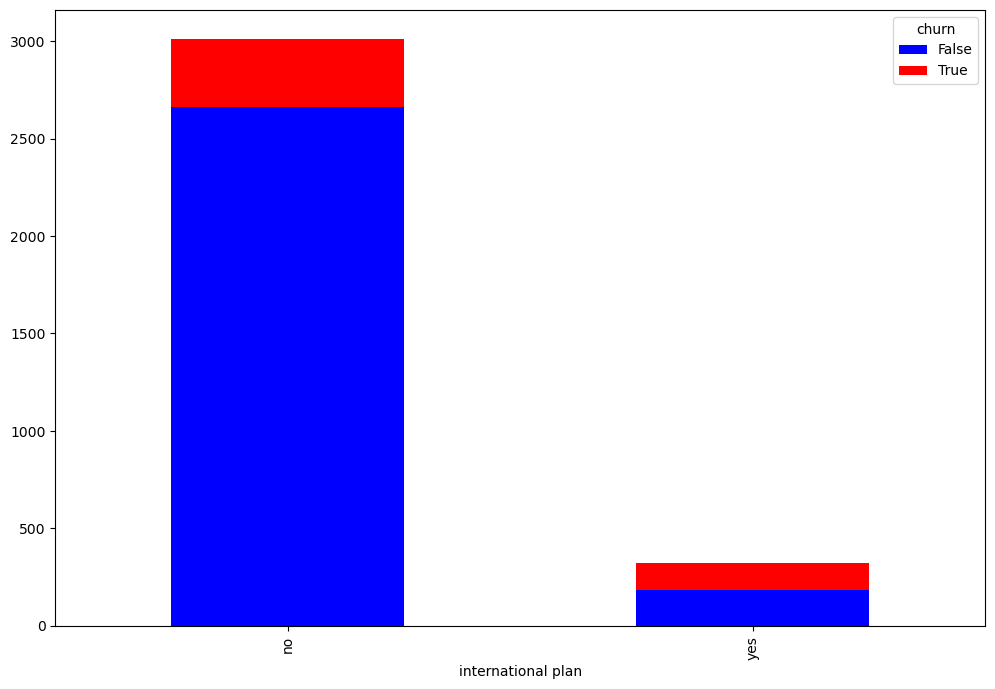

The number of customers subscribed to the international plan : 9.69%
The number of subscribed customers who churned with international plan : 42.41%


In [23]:
plot_churn_vs_plan(data,'international plan')

**Findings**

1. Voice mail plan has a small notable effect on customer churning. 

2. International call plan has an effect on customer churning, as most of the customer who churn, do not have active plan subscription. Of the 9.7% with subsription, 42.1% of those do churn.

### Multivariate analysis

In this analysis, we check for multicollinearity of features to enhance accuracy during modeling.

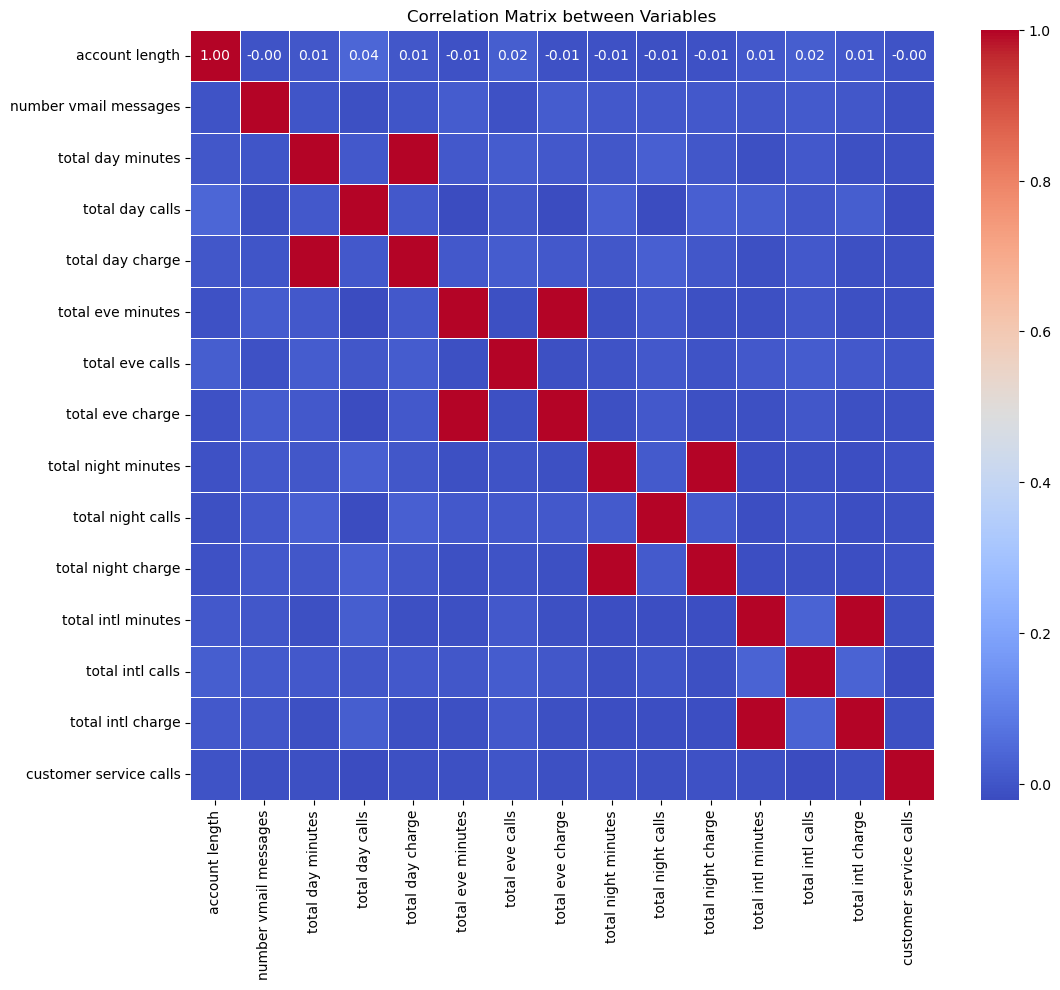

In [24]:
# Compute the correlation matric for the numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = data[numeric_columns].corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()

While most of the features in the dataset do not show significant correlation, there are some pairs of features that exhibit perfect positive correlation. This are:
- Total day charge and Total day minutes,
- Total eve charge and Total eve minutes,
- Total night charge and Total night minutes,
- Total int charge and Total int minutes.


#### 3.3 Data pre-preprocessing

First, drop the columns with multicollinearity 

In [25]:
# Dropping columns with multicollinearity.
columns_to_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


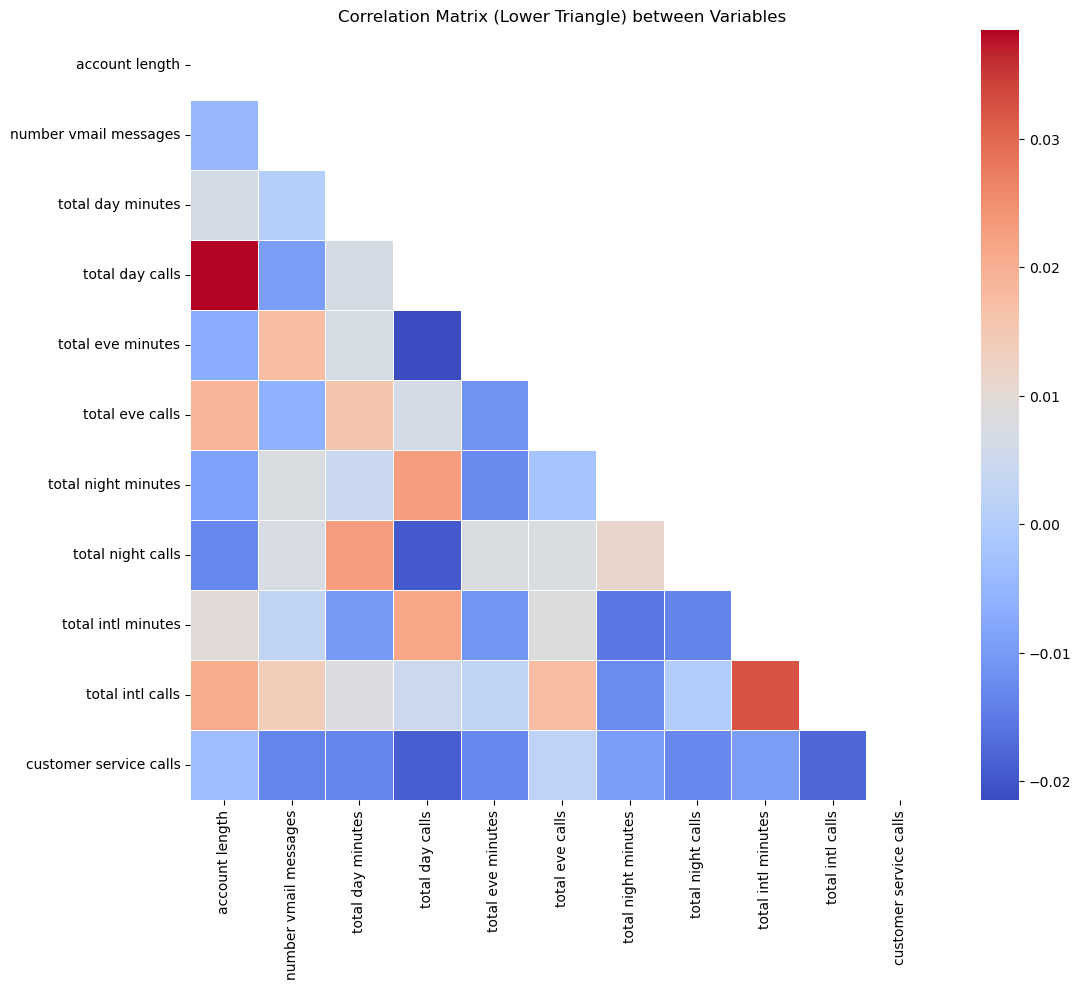

In [26]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Compute the correlation matrix
corr_matrix = data[numeric_columns].corr()
# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
# Add a title to the heatmap
plt.title('Correlation Matrix (Lower Triangle) between Variables')

# Show the plot
plt.show()

Checking the multicollinearity of the data, it is evident that the correlation between the variables are now acceptable as they are negligible.
This will ensure that the model interpretation, feature importance, Model performance, Dimensionality reduction and Model stability are enhanced.

### Train-test split

Splitting data into training and testing datasets before applying any preprocessing steps is crucial to prevent data leakage and maintain the integrity of the evaluation process. This ensures that the test data remains untouched and accurately represents unseen data.

Using a fixed random_state value, 42, is essential for code reproducibility. By setting the random_state parameter to a specific value, we ensure that the data split remains consistent across different runs of the code, which is important for reproducibility purposes.

In [27]:
# Defining the target variable(y) and the independent variables(x).
y = data['churn']
X = data.drop(['churn','area code'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 367 to 3174
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2499 non-null   object 
 1   account length          2499 non-null   int64  
 2   international plan      2499 non-null   object 
 3   voice mail plan         2499 non-null   object 
 4   number vmail messages   2499 non-null   int64  
 5   total day minutes       2499 non-null   float64
 6   total day calls         2499 non-null   int64  
 7   total eve minutes       2499 non-null   float64
 8   total eve calls         2499 non-null   int64  
 9   total night minutes     2499 non-null   float64
 10  total night calls       2499 non-null   int64  
 11  total intl minutes      2499 non-null   float64
 12  total intl calls        2499 non-null   int64  
 13  customer service calls  2499 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory u

**Encoding Categorical feature**

In ensuring data suitability for prediction, it becomes important to format it correctly. Categorical inputs pose a challenge for Machine Learning models. The project thus use one-hot encoding to convert categorical variables in the dataset into numerical values. 

In [29]:
# Specifying the categorical columns to be encoded
categorical_columns = ['international plan', 'voice mail plan' , 'state']

# Initializing the OneHotEncoder with the desired parameters
ohe = OneHotEncoder(drop='first')

# Encoding the categorical columns in the training set
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_columns]))

# Encoding the categorical columns in the test set using the fitted encoder
X_test_encoded = pd.DataFrame(ohe.transform(X_test[categorical_columns]))

In [30]:
# Setting the index of the encoded training dataframe to match the original training data
X_train_encoded.index = X_train.index

# Setting the index of the encoded test dataframe to match the original test data
X_test_encoded.index = X_test.index

In [31]:
# Removing the original categorical columns from the training data
X_train.drop(categorical_columns, axis=1, inplace=True)

# Removing the original categorical columns from the test data
X_test.drop(categorical_columns, axis=1, inplace=True)

In [32]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Scaling and transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Scaling and transform the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [33]:
# Concatenating the scaled numeric features and encoded categorical features for the training data
X_train_processed = pd.concat([X_train_scaled, X_train_encoded], axis=1)

# Concatenating the scaled numeric features and encoded categorical features for the test data
X_test_processed = pd.concat([X_test_scaled, X_test_encoded], axis=1)

Dealing with class imbalance by applying oversampling

In [34]:
# Combine X_train_processed and y_train into a single DataFrame
train_data = pd.concat([X_train_processed, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['churn'] == 0]
minority_class = train_data[train_data['churn'] == 1]

# Upsample minority class to match the number of samples in the majority class
minority_upsampled = resample(minority_class,
                              replace=True,     
                              n_samples=len(majority_class),  
                              random_state=0)  

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Separate features (X) and target (y) from upsampled data
X_train_processed_upsampled = upsampled_data.drop('churn', axis=1)
y_train_upsampled = upsampled_data['churn']

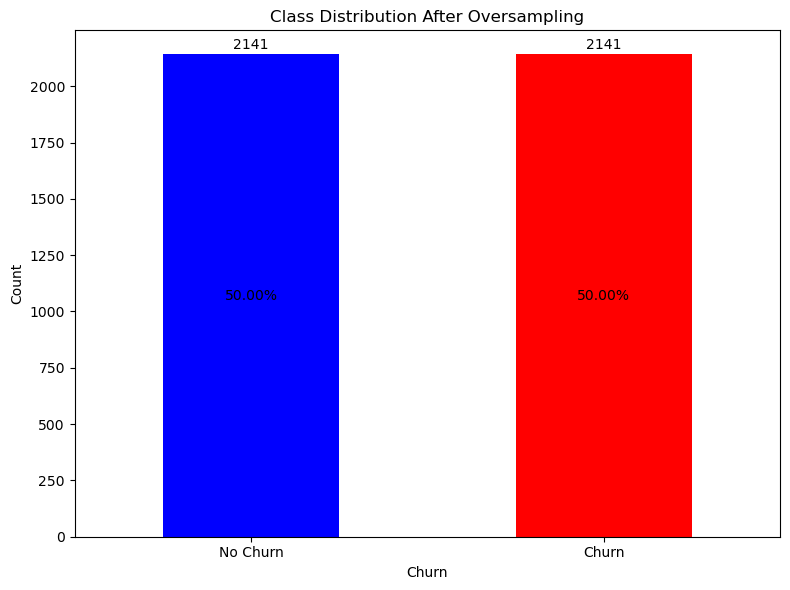

In [35]:
# Calculate class distribution after oversampling
after_counts = upsampled_data['churn'].value_counts()
after_total = after_counts.sum()

# Plot class distribution after oversampling
plt.figure(figsize=(8, 6))
bars = after_counts.plot(kind='bar', color=['blue', 'red'])
for bar in bars.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    percentage = f"{y / after_total * 100:.2f}%"
    plt.text(x, y/2, percentage, ha='center', va='center')
    plt.text(x, y + 10, str(int(y)), ha='center', va='bottom') 
plt.title('Class Distribution After Oversampling')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)
plt.tight_layout()
plt.show()


In [36]:

# Drop the last column (index 11)
X_train_processed_upsampled.drop(X_train_processed_upsampled.columns[11], axis=1, inplace=True)

In [37]:
# checking the X_train_processed_upsampled
X_train_processed_upsampled

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
367,0.190476,0.000000,0.217117,0.718519,0.696728,0.635294,0.623453,0.471831,0.900,0.166667,0.111111
3103,0.493506,0.000000,0.555141,0.600000,0.624141,0.635294,0.779989,0.563380,0.660,0.055556,0.222222
549,0.519481,0.607843,0.673464,0.244444,0.565301,0.688235,0.466649,0.366197,0.505,0.277778,0.444444
2531,0.774892,0.000000,0.404078,0.770370,0.496288,0.664706,0.433029,0.380282,0.505,0.222222,0.111111
2378,0.480519,0.000000,0.584721,0.681481,0.452296,0.552941,0.314954,0.478873,0.630,0.388889,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
2664,0.809524,0.509804,0.563469,0.629630,0.458070,0.394118,0.471490,0.598592,0.720,0.166667,0.111111
832,0.372294,0.000000,0.918725,0.562963,0.562552,0.547059,0.438408,0.669014,0.470,0.222222,0.222222
1122,0.683983,0.000000,0.535612,0.555556,0.676657,0.864706,0.588488,0.514085,0.520,0.277778,0.111111
1651,0.272727,0.000000,0.639575,0.770370,0.297498,0.511765,0.313072,0.697183,0.865,0.500000,0.111111


**Justification of above**

- Normalizing data: Normalization to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.
- Dealing with class imbalance: Dealing with class imbalance is crucial for building reliable machine learning models. Imbalanced classes introduce bias, leading to inaccurate predictions. This was dealt with through upsampling.

## 6. MODELLING

### 6.1. BASELINE MODEL: Logistic regression

In [38]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [39]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [40]:
# Checking the classifier accuracy on training set.
residuals = np.abs(y_train ^ y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))


churn
False    2134
True      365
Name: count, dtype: int64
------------------------------------
churn
False    0.853942
True     0.146058
Name: proportion, dtype: float64


In [41]:
# Confusion matrix
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 4, 'TN': 703, 'FP': 6, 'FN': 121}

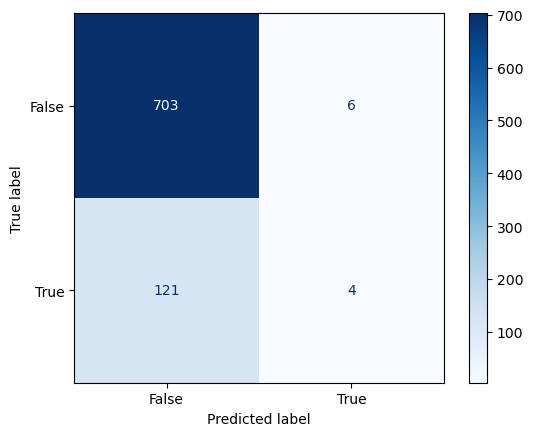

In [42]:
# Visualizing the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)

In [43]:
# Compute predicted probabilities for the positive class
y_prob_train = logreg.predict_proba(X_train)[:, 1]
y_prob_test = logreg.predict_proba(X_test)[:, 1]

# Predict classes based on the highest probability
y_hat_train = (y_prob_train > 0.5).astype(int)
y_hat_test = (y_prob_test > 0.5).astype(int)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_hat_train)
train_precision = precision_score(y_train, y_hat_train)
train_recall = recall_score(y_train, y_hat_train)
train_f1_score = f1_score(y_train, y_hat_train)
train_roc_auc = roc_auc_score(y_train, y_prob_train)

test_accuracy = accuracy_score(y_test, y_hat_test)
test_precision = precision_score(y_test, y_hat_test)
test_recall = recall_score(y_test, y_hat_test)
test_f1_score = f1_score(y_test, y_hat_test)
test_roc_auc = roc_auc_score(y_test, y_prob_test)

In [44]:
# Print evaluation metrics
print('Training Accuracy: ', train_accuracy)
print('Training Precision: ', train_precision)
print('Training Recall: ', train_recall)
print('Training F1-Score: ', train_f1_score)
print('Training ROC AUC: ', train_roc_auc)
print('\n')
print('Testing Accuracy: ', test_accuracy)
print('Testing Precision: ', test_precision)
print('Testing Recall: ', test_recall)
print('Testing F1-Score: ', test_f1_score)
print('Testing ROC AUC: ', test_roc_auc)

Training Accuracy:  0.8539415766306523
Training Precision:  0.40540540540540543
Training Recall:  0.04189944134078212
Training F1-Score:  0.0759493670886076
Training ROC AUC:  0.7089909951753345


Testing Accuracy:  0.8477218225419664
Testing Precision:  0.4
Testing Recall:  0.032
Testing F1-Score:  0.05925925925925926
Testing ROC AUC:  0.7304710860366714


With a training accuracy of approximately 85.4% and a testing accuracy of about 84.8%, the model demonstrates relatively consistent performance across both training and testing datasets, suggesting reasonable generalization to unseen data. However, upon closer examination, it's apparent that the model's ability to predict churn is relatively low. This is evident from the low precision scores of around 40% on both the training and testing sets, indicating that only about 40% of the customers identified as churners by the model are actually churning. Similarly, the recall scores are quite low, indicating that the model is only capturing a small percentage of actual churn cases, approximately 4.2% on the training set and 3.2% on the testing set. Consequently, the F1-scores are also low, indicating an imbalance between precision and recall, with the model struggling to achieve both simultaneously. Further refining of the model's weakness can be achieved by evaluating other model as this is the baseline model. 

### MODEL 2: K - Nearest Neighbors

In [45]:
# Instantiate KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
test_preds = knn_classifier.predict(X_test)

# Predict on the training set
train_preds = knn_classifier.predict(X_test)

# Predict on the training set
train_preds = knn_classifier.predict(X_train_scaled)

In [46]:
#Evaluating the model

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

print("Training Set Metrics:")
print_metrics(y_train, train_preds)
print("\nTesting Set Metrics:")
print_metrics(y_test, test_preds)

Training Set Metrics:
Precision Score: 0.9136690647482014
Recall Score: 0.3547486033519553
Accuracy Score: 0.9027611044417767
F1 Score: 0.5110663983903421

Testing Set Metrics:
Precision Score: 0.17857142857142858
Recall Score: 0.8
Accuracy Score: 0.4184652278177458
F1 Score: 0.291970802919708


The churn prediction model demonstrates high precision on the training set, correctly identifying 91.4% of predicted churn cases, though its recall is lower at 35.5%. Despite this, it achieves an overall accuracy of 90.3%, with a balanced F1 score. However, on the testing set, while maintaining a high recall of 80.0%, precision drops significantly to 17.9%, leading to an accuracy of 41.8%. This decline indicates a challenge in generalizing to unseen data. Further refinement through feature parameter tuning may improve its predictive reliability('Using optimal k').

**Finding the optimal K**

In [47]:
def find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    

find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 7
F1-Score: 0.40476190476190477


In [48]:
# Create a new classifier with k=7
knn_classifier_7 = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier on the training data
knn_classifier_7.fit(X_train_scaled, y_train)

# Predict on the test set
test_preds = knn_classifier_7.predict(X_test)

# Predict on the training set
train_preds = knn_classifier_7.predict(X_train_scaled)

# Define a function to print evaluation metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
# Print evaluation metrics for the training set
print("Training Set Metrics:")
print_metrics(y_train, train_preds)

# Print evaluation metrics for the testing set
print("\nTesting Set Metrics:")
print_metrics(y_test, test_preds)
    

Training Set Metrics:
Precision Score: 0.9256198347107438
Recall Score: 0.3128491620111732
Accuracy Score: 0.8979591836734694
F1 Score: 0.46764091858037576

Testing Set Metrics:
Precision Score: 0.1825242718446602
Recall Score: 0.752
Accuracy Score: 0.4580335731414868
F1 Score: 0.29375


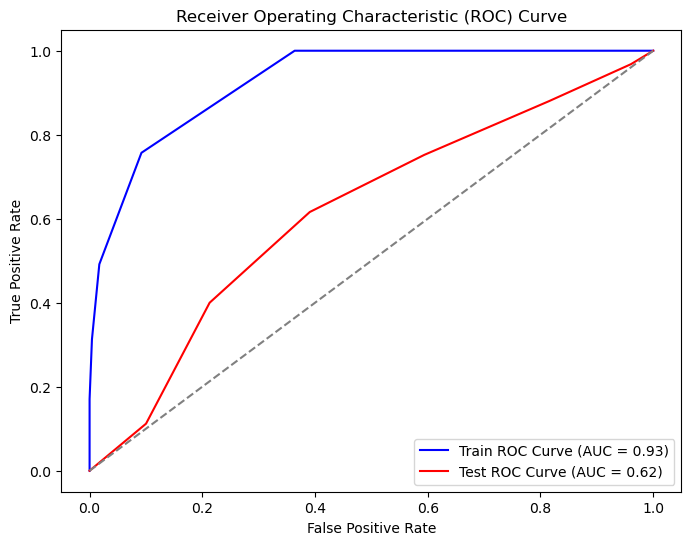

Training Set AUC Score: 0.9278876888834383
Testing Set AUC Score: 0.6174837799717914


In [49]:
# Calculate the probabilities for positive class (churned) for both training and testing sets
train_probs = knn_classifier_7.predict_proba(X_train_scaled)[:, 1]
test_probs = knn_classifier_7.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for both training and testing sets
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calculate the AUC score for both training and testing sets
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (AUC = {:.2f})'.format(train_auc), color='blue')
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (AUC = {:.2f})'.format(test_auc), color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("Training Set AUC Score:", train_auc)
print("Testing Set AUC Score:", test_auc)

After using the best k-value; For the training set, the model exhibits a notable increase in precision, accurately identifying approximately 92.6% of predicted churn cases. However, its recall is relatively low, capturing only around 31.3% of all actual churn instances. Despite this, the model achieves an overall accuracy of approximately 89.8%, indicating its effectiveness in making correct predictions overall. The F1 score, reflecting the balance between precision and recall, shows improvement compared to previous iterations, suggesting a better equilibrium between these two metrics.
Upon evaluation on the testing set, the model's performance sees slight enhancements, with a marginal increase in recall, while precision remains low. Consequently, the model's accuracy on the testing set shows only a minor improvement. The F1 score, while showing slight improvement, still indicates a challenge in achieving a balanced performance between precision and recall.while parameter tuning has led to modest improvements in certain metrics, the model's ability to generalize to unseen data remains limited.
Also, the testing set AUC score of 0.617 indicates a notable drop in discriminative performance compared to the training set. While the model still demonstrates some ability to discriminate between churn and non-churn instances in the testing data, the lower AUC score suggests that its performance is less robust on unseen data.

### MODEL 3: DECISION TREE